In [1]:
#import
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from network_control.metrics import node_strength, ave_control, modal_control
from network_control.utils import rank_int, matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
workdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/'
A = np.load(os.path.join(workdir, 'schaefer_200_streamlineCount_A.npy'))

g = 0
gradient = np.loadtxt((os.path.join(workdir, 'schaefer_200_pnc_grads_template.txt')))[:, g]

In [3]:
print(A.shape)
print(gradient.shape)

(200, 200, 1068)
(200,)


In [4]:
n_nodes = A.shape[0]
n_subs = A.shape[2]

In [5]:
# compute strength and controllability
s = np.zeros((n_subs, n_nodes))
ac = np.zeros((n_subs, n_nodes))
mc = np.zeros((n_subs, n_nodes))

for i in np.arange(n_subs):
    a = A[:, :, i]
    a_norm = matrix_normalization(a)
    s[i, :] = node_strength(a)
    ac[i, :] = ave_control(a_norm)
    mc[i, :] = modal_control(a_norm)

In [6]:
# normalize over subjects
for i in np.arange(n_nodes):
    s[:, i] = rank_int(s[:, i])
    ac[:, i] = rank_int(ac[:, i])
    mc[:, i] = rank_int(mc[:, i])

In [7]:
# compute cross subject correlations
corr_s_ac = np.zeros(n_nodes)
corr_s_mc = np.zeros(n_nodes)

for i in np.arange(n_nodes):
    corr_s_ac[i] = sp.stats.pearsonr(s[:, i], ac[:, i])[0]
    corr_s_mc[i] = sp.stats.pearsonr(s[:, i], mc[:, i])[0]

## Plot corr(s,ac) and corr(s,mc) over the principal cortical gradient of FC

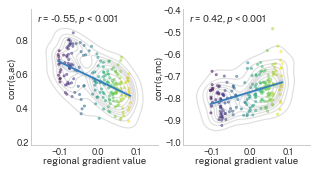

In [8]:
f, ax = plt.subplots(1, 2, figsize=(5, 2.5))
reg_plot(x=gradient, y=corr_s_ac, xlabel='regional gradient value', ylabel='corr(s,ac)', ax=ax[0], c=gradient)
reg_plot(x=gradient, y=corr_s_mc, xlabel='regional gradient value', ylabel='corr(s,mc)', ax=ax[1], c=gradient)
plt.show()
f.savefig(os.path.join(workdir, 'docs', 'pages', 'examples', 'gradient_metric_correlations'), dpi=300, bbox_inches='tight', pad_inches=0.1)